In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
plt.style.use('ggplot')
from sympy import *
import copy
import re
from matplotlib import cm
from scipy import sparse
import scipy.sparse as sprs
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn import cross_validation

from joblib import Parallel, delayed
import multiprocessing
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [50]:
data = []
data.append(pd.read_csv('data1.txt',delimiter='\\s+'))
data.append(pd.read_csv('data2.txt',delimiter='\\s+'))
data1 = pd.read_csv('data.txt',delimiter='\\s+')

In [46]:
data[0]

,angle,channel,counter,time,particles,frequency
0,10,960,100707,328,2379088,"7253,3"
1,30,902,129761,759,486377,"640,8"
2,40,846,97175,645,330154,"511,9"
3,50,727,68452,526,229280,"435,9"
4,60,641,39059,313,120892,"386,2"
5,70,555,32099,289,101149,350
6,90,472,16317,158,47566,"301,1"


In [52]:
data[1]

,angle,channel,counter,time,particles,frequency
0,10,845,230443,320,2330233,"7282,1"
1,40,663,228349,1009,346077,343
2,55,512,71833,375,103802,"276,8"
3,60,485,97667,525,136843,"260,7"
4,70,443,86014,503,119912,"238,4"
5,80,380,48377,304,67479,222
0,0,892,621250,810,6444731,"7956,5"
1,2,885,221302,306,2476937,"8094,6"


In [51]:
data[1] = pd.concat([data[1],data1],axis=0)

In [186]:
s_ch = 20/500
mc2 = 0.511 * 1e6

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


data0 N_0, N_90: [ 1028.80563987   467.35481238]
E_y: 613883.424865
data1 N_0, N_90: [ 1012.78173328   467.64719336]
E_y: 595670.740374
0.06297052154195011


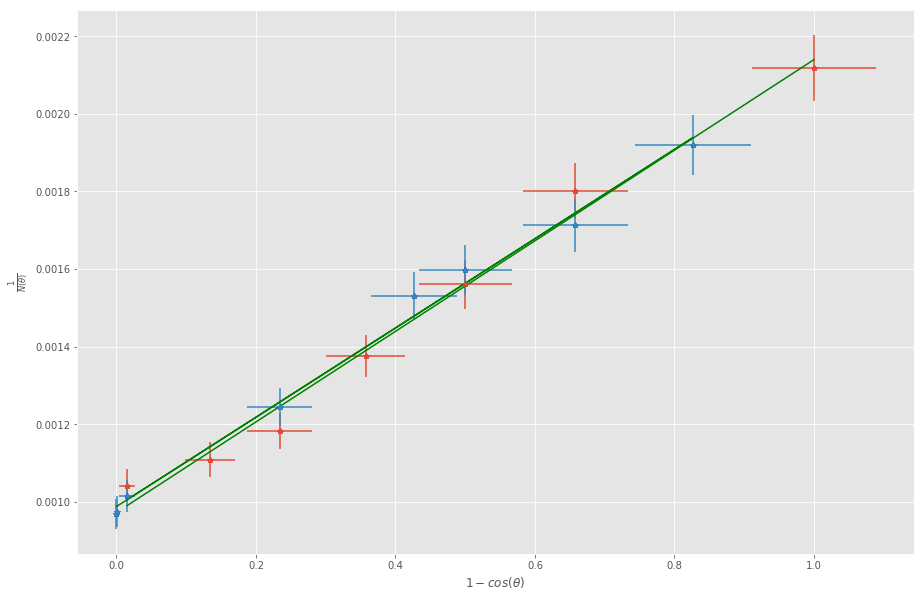

In [187]:
plt.figure(figsize=(15,10))
c = ['red','blue']
delta = 0
for i in range(2):
    if i == 1:
        delta = 141
    clf = LinearRegression()
    Y = 1/(data[i]['channel'] + delta)
    X = 1 - np.cos(data[i]['angle']/180*np.pi)
    clf.fit(X.reshape((len(X),1)), Y)
    Ns = 1/clf.predict([[0],[1]])
    Ey = mc2*(Ns[0] - Ns[1])/Ns[1]
    print('data' + str(i) + ' N_0, N_90: ' + str(Ns))
    print('E_y: ' + str(Ey))
    y_pred = clf.predict(X.reshape((len(X),1)))
    s_g = Y*s_ch
    plt.plot(X, Y,'*',color=c[i])
    plt.errorbar(X, Y, fmt='*',
                 yerr=s_g,xerr= 4*2*X/data[i]['angle'])
    plt.plot(X, y_pred,'green')
plt.ylabel(r'$\frac{1}{N(\theta)}$')
plt.xlabel(r'$1-cos(\theta)$')
print(np.mean(2/data[0]['angle']))

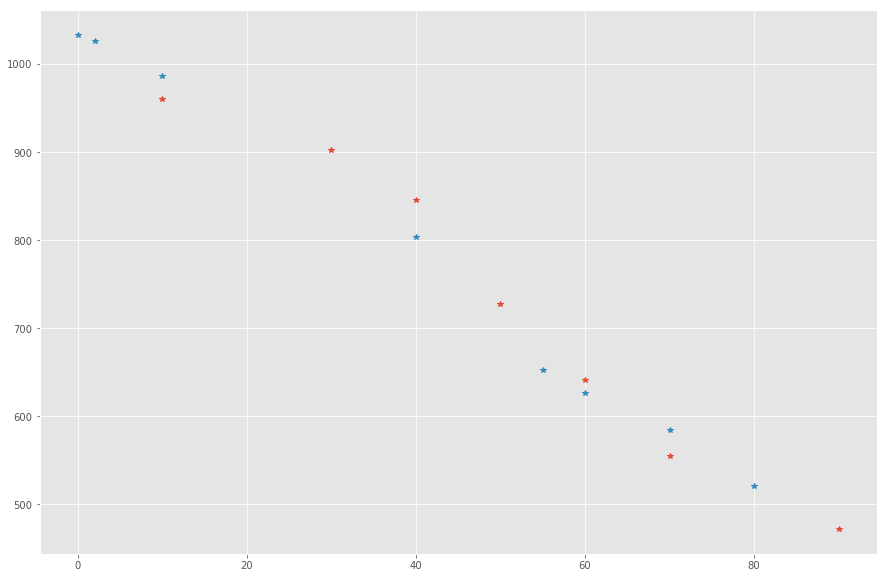

In [148]:
plt.figure(figsize=(15,10))
delta = 0
mp = dict()
for i in range(2):
    if i == 1:
        delta = 141
    a = np.array(data[i]['angle'])
    c = np.array(data[i]['channel'])
    plt.plot(a, c + delta,'*')

In [147]:
mn = [115,183,156,112]
np.mean(mn)

141.5

In [168]:
N1 = 0.0265*1500 + 371.17
N2 = 0.3274*1500 + 187.45

In [172]:
N2,N2

(678.55, 678.55)